In [175]:
jt -t chesterish

SyntaxError: invalid syntax (<ipython-input-175-de2e746ade80>, line 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sb
import datetime
from scipy.stats import linregress
import datetime

In [2]:
realestate_sales_df = pd.read_csv("aus-property-sales-sep2018-april2020.csv")
realestate_sales_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-18 00:00:00,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
1,2018-09-24 00:00:00,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320329,2019-09-09 00:00:00,NaN,Taylor,Canberra,ACT,-35.152128,149.099435,3,townhouse,ACT934,ACT
320330,2019-09-10 00:00:00,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10 00:00:00,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10 00:00:00,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


?pd.to_datetime

In [4]:
realestate_sales_df['date_sold'] = pd.to_datetime(realestate_sales_df['date_sold'], format="%Y-%m-%d %H:%M:%S")

In [5]:
realestate_sales_df['quarter'] = realestate_sales_df['date_sold'].dt.quarter

In [97]:
realestate_sales_df['month']= realestate_sales_df['date_sold'].dt.month

In [98]:
realestate_sales_df['year']= realestate_sales_df['date_sold'].dt.year

In [99]:
realestate_sales_df['date_sold'] = pd.to_datetime(realestate_sales_df['date_sold'], format="%Y-%m-%d %H:%M:%S")
realestate_sales_df['quarter'] = realestate_sales_df['date_sold'].dt.quarter
realestate_sales_df['year']= realestate_sales_df['date_sold'].dt.year

In [100]:
#Narrow data to WA only

wa_realestate_df = realestate_sales_df.loc[realestate_sales_df['state']=="WA"]

In [101]:
wa_realestate_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year,month
54789,2019-02-06,120000.0,Kelmscott,Perth,WA,-32.118235,116.018271,3,unit,WA2915,WA321,1,2019,2
54790,2019-05-24,NaN,Kelmscott,Perth,WA,-32.117147,116.011979,3,unit,WA2915,WA321,2,2019,5
54791,2020-02-27,329000.0,Kelmscott,Perth,WA,-32.120796,116.019722,3,unit,WA2915,WA321,1,2020,2
54792,2020-06-23,159000.0,Kelmscott,Perth,WA,-32.110688,116.014602,2,unit,WA2915,WA321,2,2020,6
54793,2019-04-22,NaN,Piara Waters,Perth,WA,-32.137776,115.928161,3,unit,WA3112,WA321,2,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313743,2020-03-21,870000.0,Burswood,Perth,WA,-31.957961,115.895464,4,townhouse,WA3151,WA316,1,2020,3
313744,2020-05-11,NaN,Burswood,Perth,WA,-31.969290,115.896280,3,townhouse,WA3151,WA316,2,2020,5
313745,2019-04-20,NaN,Lathlain,Perth,WA,-31.970371,115.903924,3,townhouse,WA3334,WA316,2,2019,4
313746,2019-07-19,NaN,Lathlain,Perth,WA,-31.974653,115.906999,3,townhouse,WA3334,WA316,3,2019,7


In [102]:
wa_realestate_df.sort_values(['date_sold'], ascending = True) 

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year,month
235071,2018-09-02,530000.0,East Victoria Park,Perth,WA,-31.989368,115.903813,3,house,WA3143,WA316,3,2018,9
202249,2018-09-02,170000.0,Armadale,Perth,WA,-32.143731,115.994765,3,house,WA3220,WA321,3,2018,9
228033,2018-09-02,NaN,Two Rocks,Perth,WA,-31.505544,115.599803,3,house,WA2518,WA309,3,2018,9
57108,2018-09-02,280000.0,Como,Perth,WA,-31.993275,115.873553,2,unit,WA3142,WA318,3,2018,9
54858,2018-09-02,155500.0,Maylands,Perth,WA,-31.935291,115.901328,1,unit,WA3156,WA314,3,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215228,2020-07-16,NaN,Bateman,Perth,WA,-32.049090,115.844721,4,house,WA3104,WA312,3,2020,7
229519,2020-07-16,670000.0,Clarkson,Perth,WA,-31.695755,115.721247,4,house,WA3199,WA309,3,2020,7
312607,2020-07-16,NaN,Maylands,Perth,WA,-31.941193,115.906177,2,townhouse,WA3156,WA314,3,2020,7
213000,2020-07-16,NaN,Kingsley,Perth,WA,-31.800630,115.785950,5,house,WA3187,WA371,3,2020,7


In [103]:
wa_realestate_df.property_type.unique()

array(['unit', 'house', 'townhouse'], dtype=object)

In [104]:
wa_realestate_df.suburb.unique()

array(['Kelmscott', 'Piara Waters', 'Armadale', 'Mount Richon',
       'Bayswater', 'Morley', 'Maylands', 'Embleton', 'Rivervale',
       'Cloverdale', 'Redcliffe', 'Belmont', 'Ascot', 'Canning Vale',
       'Willetton', 'Shelley', 'Parkwood', 'Riverton', 'Wilson',
       'Cannington', 'Ferndale', 'Bentley', 'Queens Park',
       'East Cannington', 'Lynwood', 'St James', 'Munster', 'Beeliar',
       'Atwell', 'Success', 'Coogee', 'Spearwood', 'Hamilton Hill',
       'North Coogee', 'Yangebup', 'Coolbellup', 'Leeming',
       'Hammond Park', 'Aubin Grove', 'Cockburn Central', 'Fremantle',
       'South Fremantle', "O'Connor", 'North Fremantle', 'Beaconsfield',
       'White Gum Valley', 'Martin', 'Thornlie', 'Gosnells', 'Maddington',
       'Beckenham', 'Woodvale', 'Joondalup', 'Duncraig', 'Greenwood',
       'Warwick', 'Hillarys', 'Heathridge', 'Mullaloo', 'Craigie',
       'Edgewater', 'Kingsley', 'Ocean Reef', 'Sorrento', 'Marmion',
       'Beldon', 'Kinross', 'Connolly', 'Currambine

In [105]:
totsales_suburb = wa_realestate_df['suburb'].value_counts()
totsales_suburb.head(30)

Baldivis          760
Canning Vale      558
Scarborough       479
Dianella          463
Morley            441
Thornlie          421
Ellenbrook        417
Rockingham        380
South Perth       366
East Perth        363
Maylands          362
Duncraig          360
Perth             349
Como              348
Gosnells          338
Bayswater         331
Byford            319
Willetton         319
Clarkson          310
Butler            293
Secret Harbour    292
Claremont         291
Mount Lawley      291
Wembley           290
Subiaco           273
Armadale          272
Port Kennedy      270
Waikiki           268
Ballajura         268
Rivervale         261
Name: suburb, dtype: int64

In [106]:
totsales_property = wa_realestate_df['property_type'].value_counts()
totsales_property

house        34299
unit          4138
townhouse     1224
Name: property_type, dtype: int64

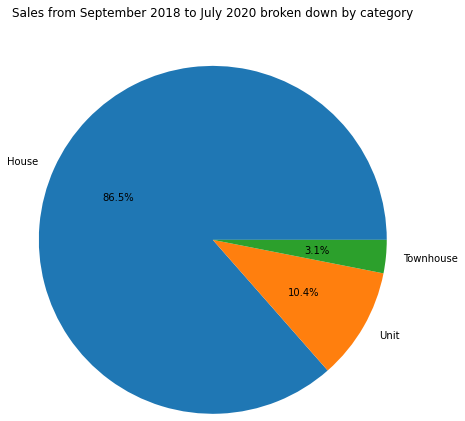

In [107]:
plt.pie(totsales_property, labels=['House','Unit', 'Townhouse'], radius = 2, autopct='%1.1f%%')
plt.title("Sales from September 2018 to July 2020 broken down by category", y= 1.5)
plt.show()

In [108]:
print(wa_realestate_df.dtypes)

date_sold        datetime64[ns]
price                   float64
suburb                   object
city_name                object
state                    object
lat                     float64
lon                     float64
bedrooms                  int64
property_type            object
loc_pid                  object
lga_pid                  object
quarter                   int64
year                      int64
month                     int64
dtype: object


In [109]:
wa_realestate_df.price.isnull().sum().sum()

12995

# Break Dataframe into Separate Dataframes for Year

In [110]:
wa_realestate_2018df = wa_realestate_df.loc[wa_realestate_df['year'] == 2018] 
wa_realestate_2018df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year,month
54795,2018-10-08,169000.0,Armadale,Perth,WA,-32.147623,116.014992,2,unit,WA3220,WA321,4,2018,10
54796,2018-12-20,219000.0,Armadale,Perth,WA,-32.154939,116.010104,3,unit,WA3220,WA321,4,2018,12
54829,2018-10-23,144500.0,Bayswater,Perth,WA,-31.925058,115.932127,2,unit,WA2866,WA314,4,2018,10
54846,2018-10-05,405000.0,Morley,Perth,WA,-31.882650,115.894454,3,unit,WA2870,WA314,4,2018,10
54847,2018-11-20,NaN,Morley,Perth,WA,-31.890418,115.900652,2,unit,WA2870,WA314,4,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313690,2018-10-04,NaN,Mosman Park,Perth,WA,-32.004645,115.761122,3,townhouse,WA3100,WA375,4,2018,10
313701,2018-09-24,463500.0,East Victoria Park,Perth,WA,-31.980826,115.902409,3,townhouse,WA3143,WA316,3,2018,9
313708,2018-09-25,400000.0,Victoria Park,Perth,WA,-31.975596,115.892134,3,townhouse,WA3148,WA316,3,2018,9
313709,2018-10-29,620000.0,Victoria Park,Perth,WA,-31.971405,115.886967,3,townhouse,WA3148,WA316,4,2018,10


In [111]:
wa_realestate_2019df = wa_realestate_df.loc[wa_realestate_df['year'] == 2019] 
wa_realestate_2019df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year,month
54789,2019-02-06,120000.0,Kelmscott,Perth,WA,-32.118235,116.018271,3,unit,WA2915,WA321,1,2019,2
54790,2019-05-24,NaN,Kelmscott,Perth,WA,-32.117147,116.011979,3,unit,WA2915,WA321,2,2019,5
54793,2019-04-22,NaN,Piara Waters,Perth,WA,-32.137776,115.928161,3,unit,WA3112,WA321,2,2019,4
54794,2019-11-07,265000.0,Piara Waters,Perth,WA,-32.133040,115.914919,2,unit,WA3112,WA321,4,2019,11
54797,2019-01-25,189000.0,Armadale,Perth,WA,-32.149086,116.009915,3,unit,WA3220,WA321,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313739,2019-10-25,NaN,Burswood,Perth,WA,-31.955751,115.896459,3,townhouse,WA3151,WA316,4,2019,10
313740,2019-12-05,NaN,Burswood,Perth,WA,-31.957506,115.896996,3,townhouse,WA3151,WA316,4,2019,12
313745,2019-04-20,NaN,Lathlain,Perth,WA,-31.970371,115.903924,3,townhouse,WA3334,WA316,2,2019,4
313746,2019-07-19,NaN,Lathlain,Perth,WA,-31.974653,115.906999,3,townhouse,WA3334,WA316,3,2019,7


In [112]:
wa_realestate_2020df = wa_realestate_df.loc[wa_realestate_df['year'] == 2020] 
wa_realestate_2020df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year,month
54791,2020-02-27,329000.0,Kelmscott,Perth,WA,-32.120796,116.019722,3,unit,WA2915,WA321,1,2020,2
54792,2020-06-23,159000.0,Kelmscott,Perth,WA,-32.110688,116.014602,2,unit,WA2915,WA321,2,2020,6
54816,2020-01-30,229000.0,Armadale,Perth,WA,-32.136001,116.016980,3,unit,WA3220,WA321,1,2020,1
54817,2020-02-03,130000.0,Armadale,Perth,WA,-32.151480,116.006470,1,unit,WA3220,WA321,1,2020,2
54818,2020-02-04,113000.0,Armadale,Perth,WA,-32.157587,116.009623,2,unit,WA3220,WA321,1,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313735,2020-04-24,NaN,Carlisle,Perth,WA,-31.979880,115.919840,3,townhouse,WA3150,WA316,2,2020,4
313741,2020-02-05,510000.0,Burswood,Perth,WA,-31.967836,115.896362,3,townhouse,WA3151,WA316,1,2020,2
313742,2020-02-19,526000.0,Burswood,Perth,WA,-31.971420,115.897840,3,townhouse,WA3151,WA316,1,2020,2
313743,2020-03-21,870000.0,Burswood,Perth,WA,-31.957961,115.895464,4,townhouse,WA3151,WA316,1,2020,3


# Break Dataframe by Total Sales Per Quarter

In [141]:
wa_realestate_qt_ct_df = wa_realestate_df.groupby(['year','quarter'])['date_sold'].count().reset_index()
wa_realestate_qt_ct_df = wa_realestate_qt_ct_df[1:-1]
wa_realestate_qt_ct_df.columns = ["Year","Quarter","Sales"]
wa_realestate_qt_ct_df

,Year,Quarter,Sales
1,2018,4,5365
2,2019,1,5016
3,2019,2,5317
4,2019,3,5609
5,2019,4,6176
6,2020,1,5837
7,2020,2,4082


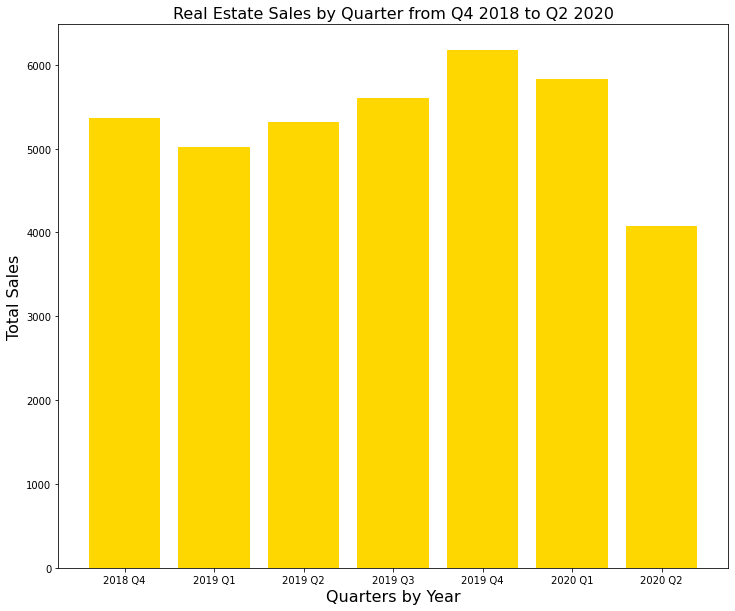

In [173]:
qt_sales_list = wa_realestate_qt_ct_df['Sales'].to_list()

plt.figure(figsize=(12,10))
plt.bar(["2018 Q4","2019 Q1","2019 Q2","2019 Q3","2019 Q4","2020 Q1","2020 Q2"], qt_sales_list, color='gold')
plt.xlabel('Quarters by Year', fontsize = 16)
plt.ylabel('Total Sales', fontsize = 16)
plt.title('Real Estate Sales by Quarter from Q4 2018 to Q2 2020', fontsize = 16)

plt.show()

# Break Dataframe by Quarter and Count by Categroy 

In [140]:
wa_realestate_qt_type_ct_df = wa_realestate_df.groupby(['year','quarter','property_type'])['date_sold'].count().reset_index()
wa_realestate_qt_type_ct_df = wa_realestate_qt_type_ct_df[3:-3]
wa_realestate_qt_type_ct_df.columns = ["Year","Quarter","Property","Sales"]
wa_realestate_qt_type_ct_df

,Year,Quarter,Property,Sales
3,2018,4,house,4706
4,2018,4,townhouse,132
5,2018,4,unit,527
6,2019,1,house,4369
7,2019,1,townhouse,166
8,2019,1,unit,481
9,2019,2,house,4614
10,2019,2,townhouse,156
11,2019,2,unit,547
12,2019,3,house,4810


In [148]:
dwellings_qt = wa_realestate_qt_type_ct_df[wa_realestate_qt_type_ct_df.Property == 'house']
townhouses_qt = wa_realestate_qt_type_ct_df[wa_realestate_qt_type_ct_df.Property == 'townhouse']
apartments_qt = wa_realestate_qt_type_ct_df[wa_realestate_qt_type_ct_df.Property == 'unit']

dwellings_qt

,Year,Quarter,Property,Sales
3,2018,4,house,4706
6,2019,1,house,4369
9,2019,2,house,4614
12,2019,3,house,4810
15,2019,4,house,5286
18,2020,1,house,5021
21,2020,2,house,3516


# Break Dataframe down by sales per month

In [144]:
wa_realestate_mn_ct_df = wa_realestate_df.groupby(['year','month'])['date_sold'].count().reset_index()
wa_realestate_mn_ct_df = wa_realestate_mn_ct_df[1:-1]
wa_realestate_mn_ct_df.columns = ["Year","Month","Sales"]
wa_realestate_mn_ct_df

,Year,Month,Sales
1,2018,10,1831
2,2018,11,1912
3,2018,12,1622
4,2019,1,1636
5,2019,2,1599
6,2019,3,1781
7,2019,4,1714
8,2019,5,1854
9,2019,6,1749
10,2019,7,1939


ValueError: shape mismatch: objects cannot be broadcast to a single shape

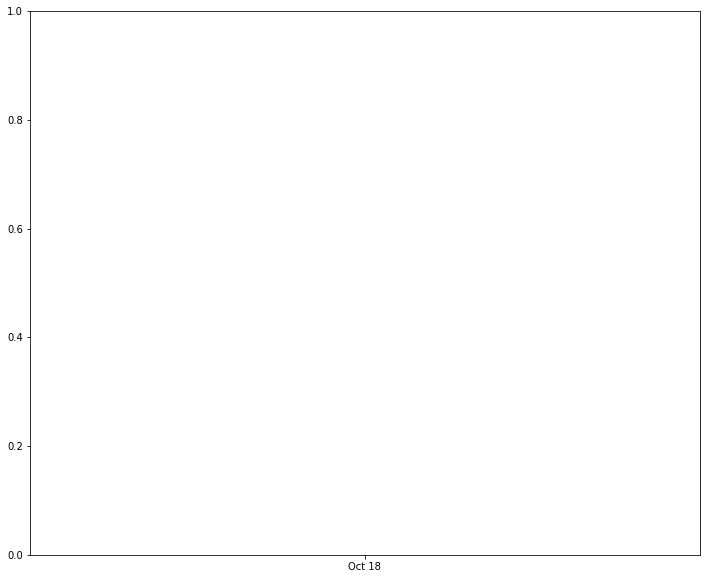

In [183]:
plt.figure(figsize=(12,10))
plt.bar(["Oct 18","Nov 18","Dec 18","Jan 19","Feb 19","Mar 19","Apr 19","May 19","Jun 19","Jul 19","Aug 19","Sept 19","Oct 19","Nov 19","Dec 19","Jan 20","Feb 20","Mar 20"], wa_realestate_mn_ct_df['Sales'], color='gold')
plt.xlabel('Quarters by Year', fontsize = 16)
plt.ylabel('Total Sales', fontsize = 16)
plt.title('Real Estate Sales by Month from October 2018 to June 2020', fontsize = 16)

plt.show()

In [ ]:
mouse_capomulin = mouse_study[mouse_study.m_id == 's185']
mouse_capomulin

mcx_axis = (mouse_capomulin.timepoint.values)
mcy_axis = (mouse_capomulin.tumorvol_mm3.values)

plt.figure(figsize=(12,10))
plt.plot(mcx_axis, mcy_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volume over time for a mouse treated with Capomulin')
plt.show()

# Break Dataframe down into sales per category per month

In [146]:
wa_realestate_mn_ct_type_df = wa_realestate_df.groupby(['year','month','property_type'])['date_sold'].count().reset_index()
wa_realestate_mn_ct_type_df = wa_realestate_mn_ct_type_df[3:-3]
wa_realestate_mn_ct_type_df.columns = ["Year","Month","Property","Sales"]
wa_realestate_mn_ct_type_df

,Year,Month,Property,Sales
3,2018,10,house,1600
4,2018,10,townhouse,43
5,2018,10,unit,188
6,2018,11,house,1704
7,2018,11,townhouse,46
...,...,...,...,...
61,2020,5,townhouse,33
62,2020,5,unit,112
63,2020,6,house,1173
64,2020,6,townhouse,42


In [147]:
dwellings_mn = wa_realestate_mn_ct_type_df[wa_realestate_mn_ct_type_df.Property == 'house']
townhouses_mn = wa_realestate_mn_ct_type_df[wa_realestate_mn_ct_type_df.Property == 'townhouse']
apartments_mn = wa_realestate_mn_ct_type_df[wa_realestate_mn_ct_type_df.Property == 'unit']

dwellings_mn

,Year,Month,Property,Sales
3,2018,10,house,1600
6,2018,11,house,1704
9,2018,12,house,1402
12,2019,1,house,1420
15,2019,2,house,1383
18,2019,3,house,1566
21,2019,4,house,1474
24,2019,5,house,1614
27,2019,6,house,1526
30,2019,7,house,1673


In [87]:
wa_realestate_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year
54789,2019-02-06 00:00:00,120000.0,Kelmscott,Perth,WA,-32.118235,116.018271,3,unit,WA2915,WA321,1,2019
54790,2019-05-24 00:00:00,NaN,Kelmscott,Perth,WA,-32.117147,116.011979,3,unit,WA2915,WA321,2,2019
54791,2020-02-27 00:00:00,329000.0,Kelmscott,Perth,WA,-32.120796,116.019722,3,unit,WA2915,WA321,1,2020
54792,2020-06-23 00:00:00,159000.0,Kelmscott,Perth,WA,-32.110688,116.014602,2,unit,WA2915,WA321,2,2020
54793,2019-04-22 00:00:00,NaN,Piara Waters,Perth,WA,-32.137776,115.928161,3,unit,WA3112,WA321,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313744,2020-05-11 00:00:00,NaN,Burswood,Perth,WA,-31.969290,115.896280,3,townhouse,WA3151,WA316,2,2020
313745,2019-04-20 00:00:00,NaN,Lathlain,Perth,WA,-31.970371,115.903924,3,townhouse,WA3334,WA316,2,2019
313746,2019-07-19 00:00:00,NaN,Lathlain,Perth,WA,-31.974653,115.906999,3,townhouse,WA3334,WA316,3,2019
313747,2019-08-22 00:00:00,NaN,Lathlain,Perth,WA,-31.974091,115.907209,3,townhouse,WA3334,WA316,3,2019
